# Neural Machine Translation using Seq2Seq Model

This Jupyter notebook contains code for a neural machine translation model using a sequence-to-sequence (Seq2Seq) model with Gated Recurrent Units (GRUs). The model is trained on a Spanish-to-English translation dataset.

## Table of Contents

1. [Imports and Setup](#imports-and-setup)
2. [Data Preparation](#data-preparation)
3. [Model Architecture](#model-architecture)
4. [Training the Model](#training-the-model)
5. [Evaluation and Visualization](#evaluation-and-visualization)

## Imports and Setup

The code begins by importing the necessary libraries and modules. It also sets up the environment and defines some constants.

```python
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import re
import random
import string
import tensorflow as tf
from keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt

batch_size = 64
vocab_size = 15000
sequence_length = 20
```

## Data Preparation

The `load_doc` function is defined to load the dataset from a file. The `create_pairs` function then creates pairs of English and Spanish sentences. The dataset is split into training, validation, and testing sets using the `split_data` function. The `custom_standardization` function is used to standardize the Spanish sentences, and the `tokenization` function is used to tokenize the English and Spanish sentences.

```python
def load_doc(path):
    # ...

def create_pairs(lines):
    # ...

def split_data(text_pairs):
    # ...

def custom_standardization(input_string):
    # ...

def tokenization(train_pairs):
    # ...

text_file = "spa.txt"
lines = load_doc(text_file)
text_pairs = create_pairs(lines)

train_pairs, val_pairs, test_pairs = split_data(text_pairs)
source_vectorization, target_vectorization = tokenization(train_pairs)
```

## Model Architecture

The `define_model` function defines the architecture of the Seq2Seq model. The model consists of an encoder (Bidirectional GRU) and a decoder (GRU with TimeDistributed Dense layer for output).

```python
embed_dim = 256
latent_dim = 1024

def define_model():
    # ...

seq2seq_rnn = define_model()
```

## Training the Model

The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss. The model is then trained on the training set for 5 epochs.

```python
seq2seq_rnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

seq2seq_history = seq2seq_rnn.fit(train_ds, epochs=5, validation_data=val_ds)
```

## Evaluation and Visualization

The training history is visualized using the `plot_metric` function to plot the training and validation loss and accuracy over epochs.

```python
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    # ...

# Visualize the training and validation loss metrices.
plot_metric(seq2seq_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

# Visualize the training and validation accuracy metrices.
plot_metric(seq2seq_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')
```
refences:Deep Learning with Python
Book by François Chollet



[INFO] printing sample data...
("I'll pop in tomorrow morning.", '[start] Vendré un momento mañana por la mañana. [end]')
[INFO] split dataset completed.
[INFO] data tokenized and convert to int numbers
inputs['english'].shape: (64, 20)
inputs['spanish'].shape: (64, 20)
targets.shape: (64, 20)
Epoch 1/5
1302/1302 [==============================] - 154s 104ms/step - loss: 1.5110 - accuracy: 0.4257 - val_loss: 1.0292 - val_accuracy: 0.5554
Epoch 2/5
1302/1302 [==============================] - 139s 107ms/step - loss: 0.9264 - accuracy: 0.5870 - val_loss: 0.7770 - val_accuracy: 0.6382
Epoch 3/5
1302/1302 [==============================] - 144s 110ms/step - loss: 0.6717 - accuracy: 0.6642 - val_loss: 0.6804 - val_accuracy: 0.6725
Epoch 4/5
1302/1302 [==============================] - 145s 111ms/step - loss: 0.5132 - accuracy: 0.7167 - val_loss: 0.6477 - val_accuracy: 0.6881
Epoch 5/5
1302/1302 [==============================] - 151s 116ms/step - loss: 0.4070 - accuracy: 0.7589 - val_loss: 

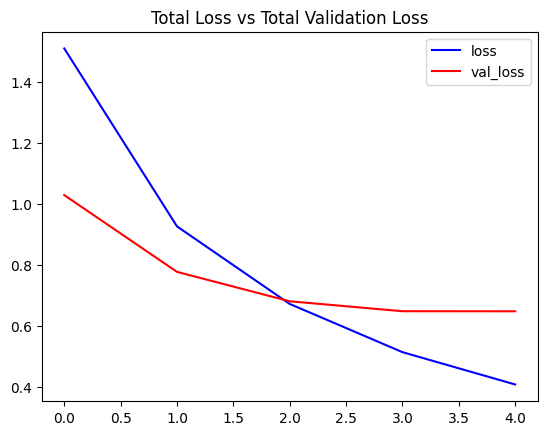

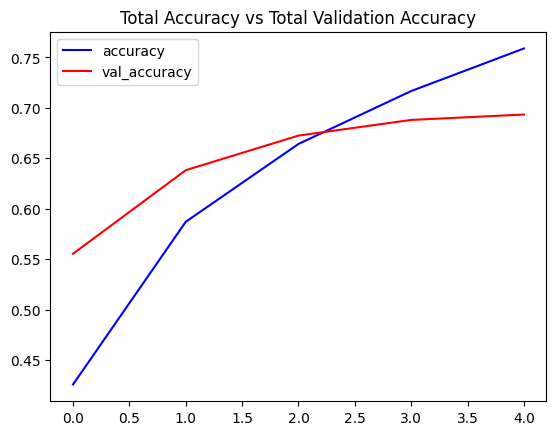

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import re
import random
import string
import tensorflow as tf
from keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt


batch_size = 64
vocab_size = 15000
sequence_length = 20


def load_doc(path):
    
    with open(path, encoding="utf-8") as f:
        lines = f.read().split("\n")[:-1]

    return lines

def create_pairs(lines):
    text_pairs = []
    for line in lines:
        english, spanish = line.split("\t")
        spanish = "[start] " + spanish + " [end]"
        text_pairs.append((english, spanish))
    print("[INFO] printing sample data...")
    print(random.choice(text_pairs))
    return text_pairs

def split_data(text_pairs):

    random.shuffle(text_pairs)
    num_val_samples = int(0.15 * len(text_pairs))
    num_train_samples = len(text_pairs) - 2 * num_val_samples
    train_pairs = text_pairs[:num_train_samples]
    val_pairs = text_pairs[num_train_samples:num_train_samples + num_val_samples]
    test_pairs = text_pairs[num_train_samples + num_val_samples:]

    print("[INFO] split dataset completed.")

    return train_pairs, val_pairs, test_pairs


def custom_standardization(input_string):

    strip_chars = string.punctuation + "¿"
    strip_chars = strip_chars.replace("[", "")
    strip_chars = strip_chars.replace("]", "")

    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(
        lowercase, f"[{re.escape(strip_chars)}]", "")


def tokenization(train_pairs):

    source_vectorization = layers.TextVectorization(
        max_tokens=vocab_size,
        output_mode="int",
        output_sequence_length=sequence_length)

    target_vectorization = layers.TextVectorization(
        max_tokens=vocab_size,
        output_mode="int",
        output_sequence_length=sequence_length + 1,
        standardize=custom_standardization)

    train_english_texts = [pair[0] for pair in train_pairs]
    train_spanish_texts = [pair[1] for pair in train_pairs]

    source_vectorization.adapt(train_english_texts)
    target_vectorization.adapt(train_spanish_texts)

    print("[INFO] data tokenized and convert to int numbers")

    return source_vectorization, target_vectorization

text_file = "spa.txt"
lines = load_doc(text_file)
text_pairs = create_pairs(lines)

train_pairs, val_pairs, test_pairs = split_data(text_pairs)
source_vectorization, target_vectorization = tokenization(train_pairs)

def format_dataset(eng, spa):
    eng = source_vectorization(eng)
    spa = target_vectorization(spa)
    return ({

        "english": eng,
        "spanish": spa[:, :-1],
    }, spa[:, 1:])

def make_dataset(pairs):
    eng_texts, spa_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    spa_texts = list(spa_texts)
    dataset = tf.data.Dataset.from_tensor_slices((eng_texts, spa_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset, num_parallel_calls=4)
    return dataset.shuffle(2048)

train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

for inputs, targets in train_ds.take(1):
    print(f"inputs['english'].shape: {inputs['english'].shape}")
    print(f"inputs['spanish'].shape: {inputs['spanish'].shape}")
    print(f"targets.shape: {targets.shape}")

embed_dim = 256
latent_dim = 1024

def define_model():

    source = layers.Input(shape=(None,), dtype="int64", name="english")
    x = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(source)

    past_target = layers.Input(shape=(None,), dtype="int64", name="spanish")
    y = layers.Embedding(vocab_size, embed_dim, mask_zero=True)(past_target)

    #Encoder
    encoded_source = layers.Bidirectional(layers.GRU(latent_dim), merge_mode="sum")(x)

    #Decoder
    y = layers.GRU(latent_dim, return_sequences=True)(y, initial_state=encoded_source)
    y = layers.TimeDistributed(layers.Dropout(0.5))(y)
    target_next_step = layers.TimeDistributed(layers.Dense(vocab_size, activation="softmax"))(y)

    seq2seq_rnn = keras.Model([source, past_target], target_next_step)

    return seq2seq_rnn


def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()
    plt.show()


seq2seq_rnn = define_model()

seq2seq_rnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

seq2seq_history = seq2seq_rnn.fit(train_ds, epochs=5, validation_data=val_ds)

# Visualize the training and validation loss metrices.
plot_metric(seq2seq_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

# Visualize the training and validation accuracy metrices.
plot_metric(seq2seq_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

